# Logistic Regression


## 符号描述
假设有数据集：$D= \left \{(x^{(1)}, y^{(1)}),(x^{(2)},y^{(2)}),\cdots, (x^{(m)},y^{(m)}) \right \}$

其中，第$i^{th}$个样本的特征为。
$$
x^{(i)} = \begin{pmatrix}
x^{(i)}_0 \\
x^{(i)}_1 \\
x^{(i)}_2 \\
vdots \\
x^{(i)}_n
\end{pmatrix}
$$
$$
y^{(i)} \in \left \{ 0, 1\right \} 
$$


其中$x_0^{(i)} = 1$，以方便以矩阵的形式计算偏置项
$$
\begin{align}
X & = \begin{pmatrix} 1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\ 1& x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\ \vdots  & \vdots & \vdots & \ddots & \vdots \\1&x_1^{(m)} & x_2^{(m)} & \cdots &x_n^{(m)}\end{pmatrix} ,
x^{(i)}_j表示第i^{th}个样本的第j^{th}个feature
\\
  Y &= \begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}\end{pmatrix} ,
   y^{(i)} \in \{0,1\} \\
  \theta&=\begin{pmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{pmatrix}
 \end{align}
 $$

## 建立模型
### 目标
分类，模型需给出某个样本属于某一类的概率。
线性回归模型的输出范围为整个实数集，所以需要找一个函数将其压缩到$[0,1]$之间。
首先想到的是阶跃函数以0为分界点，大于0预测为正类，小于0预测为负类。
但是这样的函数性质不好，它不连续。它不能反映概率，有多大自信预测为正类。
我们希望能找到子啊一定程度上接近阶跃函数，并希望它单调可微，logistic函数是常用的一个函数

$$
g(z) = \frac{1}{1+e^{-z}}
$$
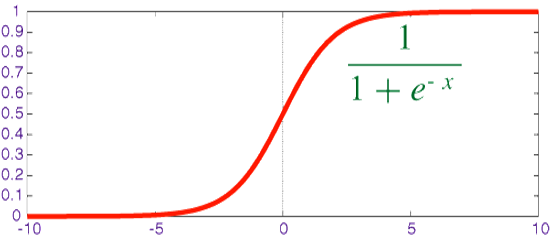

它具有如下性质：
* 连续，光滑
* 严格单调
* x趋于正无穷时y趋于1，x趋于负无穷时y趋于0
* 定义域为$(-\infty, +\infty)$
* 值域为$(0, 1)$
* 处处可导，导数为$g'(x) = g(x)\left(1-g(x)\right)$

有了这样一个函数可以将我们线性回归的结果压缩到$(0,1)$之间，我们可以将其作为模型的输出，表示在给定$x和\theta$时模型预测为1的概率。
因此我们的模型为。
$$
P(y=1|x;\theta) = h_{\theta}(x) = \frac{1}{1+e^{-\theta^Tx}}
$$

全部m个样本输入到$h_{\theta}$中为：
$$P(y=1|X;\theta)  = h_{\theta}(X) = \frac{1}{1+e^{-X\theta}}$$

### 代价函数
要想找到最好的$\theta$要先定义一个代价函数，它表示预测值与真实值之间的差距。
该选取什么样的代价函数呢？是否可以像线性回归那样选择均方差作为代价函数？
我们试一下，看这个函数在这里是否还适用。


假设如线性回归，代价函数用
$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m}\sum_{i=1}^m(g(\theta^Tx^{(i)} - y^{(i)})^2
$$

某个参数的偏导为。
$$
\frac{\partial J}{\partial \theta_k} = \frac{1}{m} \sum_{i=1}^m\left[\left((g(\theta^Tx^{(i)}) - y^{(i)}\right)g(\theta^tx^{(i)})(1-g(\theta^Tx^{(i)})x^{(i)}_k\right]
$$

$J(\theta_k)$是否单调，观察$\frac{\partial J}{\partial \theta_k}$是否总是大于0或者小于0，由于$g(\theta^Tx^{(i)}) \in (0, 1)$，因此$g(\theta^Tx^{(i)}) - y^{(i)}$的正负取决于$y^{(i)}$的标签时0还是1。所有样本和的正负也是不一定的。

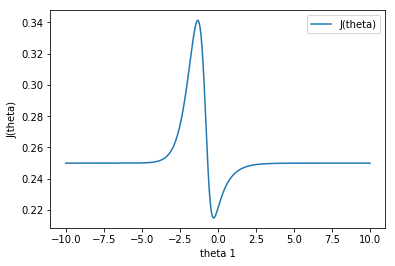

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


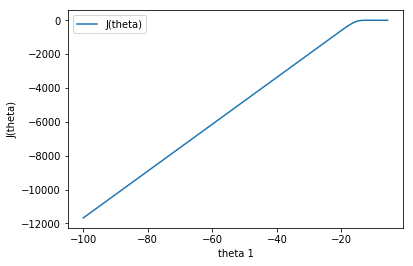

In [30]:
# 实例
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y!=2]
y = y[y!=2]

# y[y==2] = 0

m, n_feature = X.shape

X = np.insert(X, 0, values=np.ones(m), axis=1)
y = y.reshape((-1, 1))
n_feature = n_feature + 1

theta = np.random.rand(n_feature,1)

def sigmoid(x):
    return 1/(1+np.exp(-1*x))

def compute_mse(theta, X, y):
    m = X.shape[0]
    linear_result = np.dot(X, theta)
    prob = sigmoid(linear_result)
    r = prob - y
    result = np.dot(r.T, r) / (2*m)
    return result[0][0]

def compute_loss(theta, x, y):
    r = sigmoid(np.dot(theta.T, x)) - y
    r = r[0][0]
    return r*r

def compute_likehood(theta, X, y):
    linear_result = np.dot(X, theta)
    prob = sigmoid(linear_result)
    result = np.dot(y.T, np.log(prob)) + np.dot((1-y).T, np.log(1-prob))
    return result[0][0]

theta_range = np.linspace(-10,10,300)
y_range = []
one_x = X[0].reshape((-1, 1))
one_y = y[0]
for a_theta in theta_range:
    theta[3] = a_theta
    y_range.append(compute_mse(theta, X, y))

y_range = np.array(y_range)
plt.plot(theta_range, y_range, label="J(theta)")
plt.xlabel("theta 1")
plt.ylabel("J(theta)")
plt.legend() 
plt.show()





由上面分析可知，均方差并不是一个好的代价函数，我们希望我们的代价函数是凸函数或凹函数，方便进行优化。
要想一个新的代价函数。
由模型
$$
P(y=1|x;\theta) = h_{\theta}(x) 
$$
则
$$
P(y=0|x;\theta) = 1 - h_{\theta}(x) 
$$
将两个式子组合在一起

$$
P(y|x; \theta) = h_{\theta}(x)^y \cdot (1-h_{\theta}(x))^{(1-y)}
$$


### 极大似然估计
已知m个样本的输出，并且这m个样本是独立同分布的，它们服从波努力分布，需要求一组最优的$\theta$使得$P(y|X; \theta)$最大，这里$\theta$未知，此时称其为似然函数（当$\theta$已知时称为概率函数）。
此时m个样本的似然函数为。
$$
L(\theta) = P(y^{(1)}, y^{(2)}, \cdots, y^{(m)} | x^{(1)}, x^{(2)}, \cdots, x^{(m)};\theta)
$$


由于m个样本时独立的，意味着
$$
L(\theta) = P(y^{(1)}, y^{(2)}, \cdots, y^{(m)} | x^{(1)}, x^{(2)}, \cdots, x^{(m)};\theta) = P(y^{(1)} | x^{(1)}, x^{(2)}, \cdots, x^{(m)}; \theta)P(y^{(2)} | x^{(1)}, x^{(2)}, \cdots, x^{(m)}; \theta) \cdots P( y^{(m)} | x^{(1)}, x^{(2)}, \cdots, x^{(m)};\theta) \\ 
= \prod_{i=1}^mP(y^{(i)}|x^{(1)}, x^{(2)}, \cdots, x^{(m)}; \theta) 
$$

又由于$y^{(i)}$只与$x^{(i)}$有关，与其他样本无关，因此似然函数可以写为。
$$
L(\theta) = \prod_{i=1}^mP(y^{(i)}|x^{(i)}; \theta)
$$

应用极大似然估计的思想，我们已经观察到了这样一组y，那么最优的$\theta$取值为可以最大概率得到这一组的y的参数。数学语言描述为。
$$
\theta^* = \underset{\theta}{arg max}L(\theta)
$$

## 优化
我们已经建立我们的模型
$$
P(y=1|x; \theta) = \frac{1}{1+e^{-\theta^Tx}}
$$

最优的$\theta$取值为
$$
\theta^* = \underset{\theta}{arg max} \prod_{i=1}^m\left[ h_{\theta}(x^{(i)})^{y^{(i)}} \cdot \left( 1 - h_{\theta}(x^{(i)} \right)^{1-y^{(i)}}\right]
$$

由于概率都是小于1的数，连乘之后可能由于精度原因导致数据丢失。两边取对数单调性不变，所以可以转为最大化对数似然函数。

$$
l(\theta) = log(L(\theta)) = \sum_{i=1}^m \left [ y^{(i)} log\left(h_{\theta}(x^{(i)} \right) + (1-y^{(i)})log\left( 1-h_{\theta}(x^{(i)}) \right) \right]
$$

$$
\theta^* = \underset{\theta}{argmax}\sum_{i=1}^m \left [ y^{(i)} log\left(h_{\theta}(x^{(i)} \right) + (1-y^{(i)})log\left( 1-h_{\theta}(x^{(i)}) \right) \right]
$$

对数似然函数写成向量的形式为：
$$
l(\theta) = y^T log\left( h_{\theta}(X) \right) + (1-y)^T (1-h_{\theta}(X))
$$

#### 梯度下降
求偏导
$$
\frac{\partial l}{\partial \theta_k} = \sum_{i=1}^m \left[ y^{(i)} \cdot \frac{1}{h_{\theta}(x^{(i)})} - (1-y^{(i)})\cdot \frac{1}{1-h_{\theta}(x^{(i)})} \right]\frac{\partial }{\partial \theta_k}h_{\theta}(x^{(i)})
$$

又由于
$$
h_{\theta}(x) = g(\theta^Tx) \\
g'(z) = g(z)(1-g(z))
$$得

$$
\frac{\partial l}{\partial \theta_k} = \sum_{i=1}^m \left[ y^{(i)} \cdot \frac{1}{h_{\theta}(x^{(i)})} - (1-y^{(i)})\cdot \frac{1}{1-h_{\theta}(x^{(i)})} \right]\ g(\theta^Tx^{(i)})\left( 1 - g(\theta^Tx^{(i)}\right) x^{(i)}_k
$$

化简上式得
$$
\frac{\partial l}{\partial \theta_k} = \sum_{i=m}^m \left[ y^{(i)}(1-h_{\theta}(x^{(i)})) - (1-y^{(i)})h_{\theta}(x^{(i)})  \right] x_k^{(i)} \\
 = \sum_{i=1}^m \left [ y^{(i)} - y^{(i)}h_{\theta}(x^{(i)}) - h_{\theta}(x^{(i)}) + y^{(i)}h_{\theta}(x^{(i)})   \right] x_k^{(i)} \\
 = \sum_{i=1}^m \left[ y^{(i)} - h_{\theta}(x^{(i)})\right]x_k^{(i)}
$$

写成向量形式，其中$x^{(i)}$为第$i^{th}$个样本的特征向量，维度为：$n \times 1$
$$
\frac{\partial l}{\partial \theta} = \sum_{i=1}^m \left[ y^{(i)} - h_{\theta}(x^{(i)})\right]x^{(i)}
$$

写成矩阵形式
$$
\frac{\partial l}{\partial \theta} = X^T\left (y-h_{\theta}(X) \right )
$$

梯度下降中迭代更新$\theta$
$$
\theta_{t+1} = \theta_t + \frac{\partial l}{\partial \theta}
$$

-0.08509294370821549
[[-0.10314663]
 [-1.10736376]
 [-2.90538728]
 [ 4.96507964]
 [ 1.945944  ]]


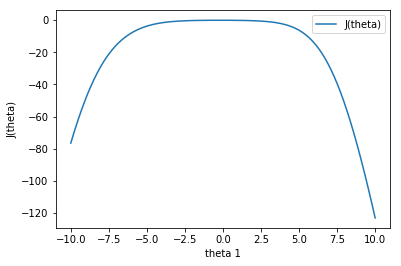

In [34]:
# 例子
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

class LogisticRegress:
    def __init__(self):
        iris = datasets.load_iris()
        X = iris.data
        y = iris.target
        X = X[y!=2]
        y = y[y!=2]
        m, n_feature = X.shape
        X = np.insert(X, 0, values=np.ones(m), axis=1)
        y = y.reshape((-1, 1))
        n_feature = n_feature + 1
        theta = np.random.rand(n_feature,1)
        self.X = X
        self.y = y
        self.m = m
        self.n = n_feature
        self.theta=theta
        self.num_iter = 1000
        self.learning_rate = 0.01
        self.C=1
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-1*x))
    
    def compute_grad(self, theta):
        X = self.X
        y = self.y
        linear_result = np.dot(X, theta)
        prob = self.sigmoid(linear_result)
        r = y - prob
        grad = np.dot(X.T, r)
        return grad
    
    def compute_grad_with_l2_norm(self, theta):
        C = self.C
        grad = self.compute_grad(theta) -  C*theta
        return grad
        
    
    def compute_cost(self, theta):
        X = self.X
        y = self.y
        linear_result = np.dot(X, theta)
        prob = self.sigmoid(linear_result)
        result = np.dot(y.T, np.log(prob)) + np.dot((1-y).T, np.log(1-prob))
        return result[0][0]
    
    def optimizer(self):
        num_iter = self.num_iter
        X = self.X
        y = self.y
        learning_rate = self.learning_rate
        theta = self.theta
        
        for i in range(num_iter):
            grad = self.compute_grad(theta)
            theta = theta + learning_rate * grad
        return theta

lr = LogisticRegress()
theta = lr.optimizer()
cost = lr.compute_cost(theta)
print(cost)
print(theta)


theta_range = np.linspace(-10,10,300)
y_range = []
one_x = X[0].reshape((-1, 1))
one_y = y[0]
for a_theta in theta_range:
    theta[0] = a_theta
    y_range.append(lr.compute_cost(theta))

y_range = np.array(y_range)
plt.plot(theta_range, y_range, label="J(theta)")
plt.xlabel("theta 1")
plt.ylabel("J(theta)")
plt.legend() 
plt.show()

In [11]:
# 使用sklearn
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y!=2]
y = y[y!=2]
m, n_feature = X.shape
# X = np.insert(X, 0, values=np.ones(m), axis=1)
y = y.reshape((-1, 1))
# n_feature = n_feature + 1
theta = np.random.rand(n_feature,1)

lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_ )

[[-0.40247392 -1.46382925  2.23785648  1.00009294]]
[-0.25906453]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Normal Equation
不知是否可以类似线性回归，用矩阵求导的方法，令其导数为0的方式求得$\theta$的驻点。
$$
l(\theta) = y^T log\left( h_{\theta}(X) \right) + (1-y)^T (1-h_{\theta}(X)) \\
\frac{\partial l}{\partial \theta} = X^T\left (y-h_{\theta}(X) \right )
$$



令$\frac{\partial l}{\partial \theta} = 0$得。
$$
 X^T\left (y-h_{\theta}(X) \right ) = 0 \\
X^Tg(X\theta) = X^Ty \\
XX^T g(X\theta) = XX^Ty \\
g(X\theta) = (XX^T)^{-1}XX^Ty \\
\frac{1}{1+e^{-X\theta}} = (XX^T)^{-1}XX^Ty \\
1 + e^{-X\theta} = \frac{1}{(XX^T)^{-1}XX^Ty} \\
e^{-X\theta} = \frac{1}{(XX^T)^{-1}XX^Ty} - 1 \\
-X\theta = log(\frac{1}{(XX^T)^{-1}XX^Ty} - 1) \\
X\theta = -log(\frac{1}{(XX^T)^{-1}XX^Ty} - 1) \\
\theta = -(X^TX)^{-1}X^Tlog(\frac{1}{(XX^T)^{-1}XX^Ty} - 1)
$$

In [20]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

class LogisticRegress2:
    def __init__(self):
        iris = datasets.load_iris()
        X = iris.data
        y = iris.target
        X = X[y!=2]
        y = y[y!=2]
        m, n_feature = X.shape
        X = np.insert(X, 0, values=np.ones(m), axis=1)
        y = y.reshape((-1, 1))
        n_feature = n_feature + 1
        theta = np.random.rand(n_feature,1)
        self.X = X
        self.y = y
        self.m = m
        self.n = n_feature
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-1*x))
    
    def normal_equation(self):
        X = self.X
        y = self.y
        
        XTX = np.dot(X.T, X)
        XXT = np.dot(X, X.T)
        XTX_invers = np.linalg.inv(XTX)
        XXT_invers = np.linalg.inv(XXT)
        theta = -1 * np.dot(XTX_invers, X.T)
        tmp = np.dot(XXT_invers, X)
        tmp = np.dot(tmp, X.T)
        tmp = np.dot(tmp, y)
        tmp = 1/tmp
        tmp = tmp -1
        tmp = np.log(tmp)
        theta = np.dot(theta, tmp)
        return theta

lr = LogisticRegress2()
theta = lr.normal_equation()

print(theta)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log


运算过程复杂，超过了计算机的精度，看来梯度下降总是行之有效的方法。